# Import Libraries

In [158]:
import pandas as pd
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

# Preprocessing Data

Source: https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset?select=yield_df.csv

Dataset features: 
- Categorical features: "Area", "Item", "Year"
- Continuous features: "average_rain_fall_mm_per_year", "pesticides_tonnes", "avg_temp"
- Target: "hg/ha_yield"

## Import Data

In [159]:
df = pd.read_csv("data.csv")
cat_cols = ["Area", "Item"]
cont_cols = ["average_rain_fall_mm_per_year", "pesticides_tonnes", "avg_temp"]
target_col = "hg/ha_yield"

df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


## Data Cleaning

In [160]:
# drop columns that has no meaning
df.drop(columns=['Unnamed: 0', 'Year'], axis='columns',inplace=True)
df.head()

,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,36613,1485.0,121.0,16.37
1,Albania,Potatoes,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",23333,1485.0,121.0,16.37
3,Albania,Sorghum,12500,1485.0,121.0,16.37
4,Albania,Soybeans,7000,1485.0,121.0,16.37


In [161]:
df.isna().sum()

Area                             0
Item                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

## Splitting Training and Test Set

In [162]:
X = df.drop(columns=[target_col])
y = df[target_col].values.reshape(-1, 1)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=766)

## Encoding Categorical Features

In [164]:
item_encoder = ce.OneHotEncoder(
    cols='Item',
    handle_unknown='return_nan',
    return_df=True,
    use_cat_names=True
)
X_train = item_encoder.fit_transform(X_train)
X_test = item_encoder.transform(X_test)

In [165]:
X_train

,Area,Item_Potatoes,Item_Wheat,Item_Plantains and others,Item_Yams,Item_Maize,Item_Cassava,Item_Sorghum,Item_Sweet potatoes,"Item_Rice, paddy",Item_Soybeans,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
21434,Nicaragua,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2280.0,6889.26,27.35
25470,Spain,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,636.0,40727.00,12.52
945,Australia,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,534.0,23899.00,17.42
17463,Kenya,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,630.0,6344.00,16.44
16724,Japan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1668.0,70262.54,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1761.0,118930.56,24.78
4768,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1761.0,367778.00,27.71
26253,Tajikistan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,691.0,247.90,8.69
23786,Qatar,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,74.0,68.00,27.92


In [166]:
area_encoder = ce.BaseNEncoder(
    cols='Area',
    base=3,
    handle_unknown='return_nan',
    return_df=True,
)
X_train = area_encoder.fit_transform(X_train)
X_test = area_encoder.transform(X_test)

In [167]:
X_train

,Area_0,Area_1,Area_2,Area_3,Area_4,Item_Potatoes,Item_Wheat,Item_Plantains and others,Item_Yams,Item_Maize,Item_Cassava,Item_Sorghum,Item_Sweet potatoes,"Item_Rice, paddy",Item_Soybeans,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
21434,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2280.0,6889.26,27.35
25470,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,636.0,40727.00,12.52
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,534.0,23899.00,17.42
17463,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,630.0,6344.00,16.44
16724,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1668.0,70262.54,13.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1761.0,118930.56,24.78
4768,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1761.0,367778.00,27.71
26253,0.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,691.0,247.90,8.69
23786,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,74.0,68.00,27.92


In [168]:
X_train.shape

(22593, 18)

In [169]:
X_train.corr()

,Area_0,Area_1,Area_2,Area_3,Area_4,Item_Potatoes,Item_Wheat,Item_Plantains and others,Item_Yams,Item_Maize,Item_Cassava,Item_Sorghum,Item_Sweet potatoes,"Item_Rice, paddy",Item_Soybeans,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Area_0,1.000000,-0.177355,-0.119036,-0.009138,-0.040623,0.052354,0.071782,-0.017358,-0.009495,0.023937,-0.042775,-0.007638,-0.047050,-0.032368,-0.030519,-0.187975,-0.160156,-0.102554
Area_1,-0.177355,1.000000,-0.061769,0.029130,0.113405,0.022105,0.030191,0.070041,-0.024156,0.024535,-0.004848,0.006347,-0.035362,-0.024906,-0.045891,0.074217,-0.277388,-0.137627
Area_2,-0.119036,-0.061769,1.000000,-0.126279,-0.157695,-0.008270,-0.012391,0.001647,0.044973,-0.006985,0.055197,0.007334,-0.014972,-0.027011,-0.005271,0.100981,0.273069,0.171113
Area_3,-0.009138,0.029130,-0.126279,1.000000,-0.044654,0.024766,-0.016493,0.028347,0.056043,-0.026536,0.028323,-0.019050,-0.012830,0.004689,-0.020590,0.174662,0.004806,0.109561
Area_4,-0.040623,0.113405,-0.157695,-0.044654,1.000000,0.010411,0.040790,0.006190,-0.041465,0.022875,-0.102920,0.016477,-0.028174,-0.004369,0.037732,-0.233038,-0.236458,-0.257576
Item_Potatoes,0.052354,0.022105,-0.008270,0.024766,0.010411,1.000000,-0.168337,-0.060119,-0.074880,-0.174613,-0.118700,-0.146874,-0.141034,-0.155281,-0.151723,-0.053614,-0.034586,-0.098620
Item_Wheat,0.071782,0.030191,-0.012391,-0.016493,0.040790,-0.168337,1.000000,-0.056775,-0.070714,-0.164899,-0.112096,-0.138703,-0.133188,-0.146643,-0.143283,-0.110764,-0.012642,-0.156473
Item_Plantains and others,-0.017358,0.070041,0.001647,0.028347,0.006190,-0.060119,-0.056775,1.000000,-0.025255,-0.058891,-0.040034,-0.049536,-0.047567,-0.052372,-0.051172,0.140193,-0.070127,0.085172
Item_Yams,-0.009495,-0.024156,0.044973,0.056043,-0.041465,-0.074880,-0.070714,-0.025255,1.000000,-0.073351,-0.049863,-0.061698,-0.059245,-0.065230,-0.063736,0.124455,0.107397,0.062092
Item_Maize,0.023937,0.024535,-0.006985,-0.026536,0.022875,-0.174613,-0.164899,-0.058891,-0.073351,1.000000,-0.116276,-0.143874,-0.138154,-0.152110,-0.148625,-0.032605,-0.026889,-0.043180


# Model Selection

### TabNet Regressor Hyperpamater Tuning

In [170]:
from pytorch_tabnet.tab_model import TabNetRegressor
import torch
import numpy as np

In [171]:
def set_seed(seed=766):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # Untuk multiple GPU
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

In [172]:
import optuna

def objective(trial):
    set_seed()
    optimizer_params = dict(lr=trial.suggest_float('learning_rate', low=1e-6, high=1e-1))
    scheduler_params = {"step_size": trial.suggest_int('scheduler_step_size', low=3, high=40), "gamma": trial.suggest_float('scheduler_gamma', low=0.01, high=0.9)}
    scheduler_fn = torch.optim.lr_scheduler.StepLR
    optimizer_name = trial.suggest_categorical(
        'optimizer_fn', 
        [
            "Adam", 
            "AdamW",
            "Adamax",
            "Adadelta",
            "Adagrad",
            "SGD",
            "RMSprop",
            "Rprop"
        ]
    )
    optimizer_fn = getattr(torch.optim, optimizer_name) 

    n_d_a = trial.suggest_int('n_d_a', low=1, high=32)
    n_steps = trial.suggest_int('n_steps', low=3, high=40)
    gamma = trial.suggest_float('gamma', low=0.01, high=0.9)
    lambda_sparse = trial.suggest_float('lambda_sparse', low=1e-6, high=1e-1)
    verbose = 1
    device_name = 'cuda'


    regressor = TabNetRegressor(
        optimizer_params=optimizer_params,
        scheduler_params=scheduler_params,
        scheduler_fn=scheduler_fn,
        optimizer_fn=optimizer_fn,
        n_d=n_d_a,
        n_a=n_d_a,
        n_steps=n_steps,
        gamma=gamma,
        lambda_sparse=lambda_sparse,
        verbose=verbose,
        device_name=device_name,
    )
    regressor.fit(X_train=X_train.values, y_train=y_train,
                eval_set=[(X_test.values, y_test)],
                patience=15,
                max_epochs=100,
                batch_size=trial.suggest_int('batch_size', low=256, high=1024, step=256),
                eval_metric=['mse'])

    y_pred = regressor.predict(X_test.values)
    r2 = r2_score(y_test, y_pred)

    return r2


In [ ]:
import logging, sys
optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))

storage = optuna.storages.RDBStorage(
    url='sqlite:///tabnetnew3.db',
    failed_trial_callback=optuna.storages.RetryFailedTrialCallback(max_retry=None),
)

study = optuna.create_study(
    direction='maximize',
    study_name='TabNet Hyperparameter Tuning',
    sampler=optuna.samplers.RandomSampler(),
    storage=storage,
    load_if_exists=True,
)

C:\Users\dheoz\AppData\Local\Temp\ipykernel_19660\441411943.py:6: ExperimentalWarning:

RetryFailedTrialCallback is experimental (supported from v2.8.0). The interface can change in the future.

[I 2025-03-27 09:19:52,330] Using an existing study with name 'TabNet Hyperparameter Tuning' instead of creating a new one.


Using an existing study with name 'TabNet Hyperparameter Tuning' instead of creating a new one.
Using an existing study with name 'TabNet Hyperparameter Tuning' instead of creating a new one.
Using an existing study with name 'TabNet Hyperparameter Tuning' instead of creating a new one.
Using an existing study with name 'TabNet Hyperparameter Tuning' instead of creating a new one.
Using an existing study with name 'TabNet Hyperparameter Tuning' instead of creating a new one.
Using an existing study with name 'TabNet Hyperparameter Tuning' instead of creating a new one.
Using an existing study with name 'TabNet Hyperparameter Tuning' instead of creating a new one.
Using an existing study with name 'TabNet Hyperparameter Tuning' instead of creating a new one.
Using an existing study with name 'TabNet Hyperparameter Tuning' instead of creating a new one.


In [ ]:
study.optimize(objective, n_trials=100)

# Results

In [175]:
study.best_params

{'learning_rate': 0.08685399863875073,
 'scheduler_step_size': 26,
 'scheduler_gamma': 0.5143303531351453,
 'optimizer_fn': 'Adamax',
 'n_d_a': 29,
 'n_steps': 31,
 'gamma': 0.871396423402976,
 'lambda_sparse': 0.08049977485491028,
 'batch_size': 256}

In [176]:
study.best_trial

FrozenTrial(number=13, state=1, values=[0.9586493968963623], datetime_start=datetime.datetime(2025, 3, 25, 12, 7, 10, 643488), datetime_complete=datetime.datetime(2025, 3, 25, 12, 46, 10, 888836), params={'learning_rate': 0.08685399863875073, 'scheduler_step_size': 26, 'scheduler_gamma': 0.5143303531351453, 'optimizer_fn': 'Adamax', 'n_d_a': 29, 'n_steps': 31, 'gamma': 0.871396423402976, 'lambda_sparse': 0.08049977485491028, 'batch_size': 256}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.1, log=False, low=1e-06, step=None), 'scheduler_step_size': IntDistribution(high=40, log=False, low=3, step=1), 'scheduler_gamma': FloatDistribution(high=0.9, log=False, low=0.01, step=None), 'optimizer_fn': CategoricalDistribution(choices=('Adam', 'AdamW', 'Adamax', 'Adadelta', 'Adagrad', 'SGD', 'RMSprop', 'Rprop')), 'n_d_a': IntDistribution(high=32, log=False, low=1, step=1), 'n_steps': IntDistribution(high=40, log=False, low=3, ste

In [177]:
study.best_trial.value

0.9586493968963623

In [178]:
def detailed_objective(trial):
    set_seed()
    optimizer_params = dict(lr=trial.suggest_float('learning_rate', low=1e-6, high=1e-1))
    scheduler_params = {"step_size": trial.suggest_int('scheduler_step_size', low=3, high=40), "gamma": trial.suggest_float('scheduler_gamma', low=0.01, high=0.9)}
    scheduler_fn = torch.optim.lr_scheduler.StepLR
    optimizer_name = trial.suggest_categorical(
        'optimizer_fn', 
        [
            "Adam", 
            "AdamW",
            "Adamax",
            "Adadelta",
            "Adagrad",
            "SGD",
            "RMSprop",
            "Rprop"
        ]
    )
    optimizer_fn = getattr(torch.optim, optimizer_name) 

    n_d_a = trial.suggest_int('n_d_a', low=1, high=32)
    n_steps = trial.suggest_int('n_steps', low=3, high=40)
    gamma = trial.suggest_float('gamma', low=0.01, high=0.9)
    lambda_sparse = trial.suggest_float('lambda_sparse', low=1e-6, high=1e-1)
    verbose = 1
    device_name = 'cuda'


    regressor = TabNetRegressor(
        optimizer_params=optimizer_params,
        scheduler_params=scheduler_params,
        scheduler_fn=scheduler_fn,
        optimizer_fn=optimizer_fn,
        n_d=n_d_a,
        n_a=n_d_a,
        n_steps=n_steps,
        gamma=gamma,
        lambda_sparse=lambda_sparse,
        verbose=verbose,
        device_name=device_name,
    )
    regressor.fit(X_train=X_train.values, y_train=y_train,
                eval_set=[(X_test.values, y_test)],
                patience=15,
                max_epochs=100,
                batch_size=trial.suggest_int('batch_size', low=256, high=1024, step=256),
                eval_metric=['mse'])

    y_pred = regressor.predict(X_test.values)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return r2, mse, rmse, mae

In [179]:
detailed_objective(study.best_trial)

c:\Users\dheoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 10741425471.99999| val_0_mse: 8322684928.0|  0:00:54s
epoch 1  | loss: 3626551832.72727| val_0_mse: 3751558144.0|  0:01:43s
epoch 2  | loss: 1498300615.27273| val_0_mse: 1972654336.0|  0:02:18s
epoch 3  | loss: 1157001882.90909| val_0_mse: 1321946368.0|  0:02:57s
epoch 4  | loss: 1012729578.90909| val_0_mse: 1056368128.0|  0:03:30s
epoch 5  | loss: 892339946.18182| val_0_mse: 934165952.0|  0:04:07s
epoch 6  | loss: 802040789.81818| val_0_mse: 907152256.0|  0:04:38s
epoch 7  | loss: 726114248.36364| val_0_mse: 773447936.0|  0:05:10s
epoch 8  | loss: 682493537.81818| val_0_mse: 1129581568.0|  0:05:40s
epoch 9  | loss: 646216474.90909| val_0_mse: 652003008.0|  0:06:12s
epoch 10 | loss: 626266948.0| val_0_mse: 583421888.0|  0:06:45s
epoch 11 | loss: 601376030.90909| val_0_mse: 549178624.0|  0:07:24s
epoch 12 | loss: 544658510.90909| val_0_mse: 886528576.0|  0:07:58s
epoch 13 | loss: 523272101.81818| val_0_mse: 493463584.0|  0:08:29s
epoch 14 | loss: 522192870.18182| val_0_

c:\Users\dheoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!



(0.9586493968963623, 309376032.0, 17589.087890625, 8413.5048828125)

In [194]:
plt = optuna.visualization.plot_optimization_history(study)
plt.update_layout(
    width=1000,
    height=500,
    legend_font_size=24,
    font_size=20,
    font_family='Times New Roman',
    title=''
)

In [207]:
plt_parallel = optuna.visualization.plot_parallel_coordinate(study, params=['optimizer_fn', 'learning_rate', 'n_d_a'])
plt_parallel.update_layout(
    margin=dict(b=150),
    width=1100,
    height=750,
    title_font_size=36,
    legend_font_size=24,
    font_size=24,
    font_family='Times New Roman',
    title=''
)

In [182]:
optuna.visualization.plot_slice(study)

In [200]:
plt_contour = optuna.visualization.plot_contour(study, params=['optimizer_fn', 'learning_rate', 'n_d_a'])
plt_contour.update_layout(
    width=2000,
    height=2000,
    title_font_size=36,
    legend_font_size=24,
    font_size=18,
    font_family='Times New Roman',
    title=''
)

In [198]:
plt_contour_optim_sched = optuna.visualization.plot_contour(study, params=['optimizer_fn', 'learning_rate'])
plt_contour_optim_sched.update_layout(
    width=1000,
    height=1000,
    title_font_size=36,
    legend_font_size=24,
    font_size=22,
    font_family='Times New Roman',
    title=''
)

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=1,
)

fig_contour_optim = optuna.visualization.plot_contour(study, params=['optimizer_fn', 'n_d_a'])
fig_contour_lr = optuna.visualization.plot_contour(study, params=['learning_rate', 'n_d_a'])

for trace in fig_contour_optim.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_contour_lr.data:
    fig.add_trace(trace, row=2, col=1)

fig.update_layout(
    width=1500,
    height=1200,
    title_font_size=46,
    legend_font_size=24,
    font=dict(
        size=32,
        family='Times New Roman'
    ),
    title=''
)

for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(size=32)

fig.update_xaxes(title_text="n_d_a", row=1, col=1)
fig.update_yaxes(title_text="optimizer_fn", row=1, col=1)
fig.update_yaxes(title_text="n_d_a", row=2, col=1)
fig.update_xaxes(title_text="learning_rate", row=2, col=1)

fig.show()


In [186]:
plt_importance = optuna.visualization.plot_param_importances(study)
plt_importance.update_layout(
    width=1000,
    height=1000,
    title_font_size=36,
    font_size=24,
    font_family='Times New Roman',
    title=''
)

In [188]:
optuna.visualization.plot_timeline(study)

C:\Users\dheoz\AppData\Local\Temp\ipykernel_19660\3191722373.py:1: ExperimentalWarning:

plot_edf is experimental (supported from v2.2.0). The interface can change in the future.



<Axes: title={'center': 'Empirical Distribution Function Plot'}, xlabel='Objective Value', ylabel='Cumulative Probability'>

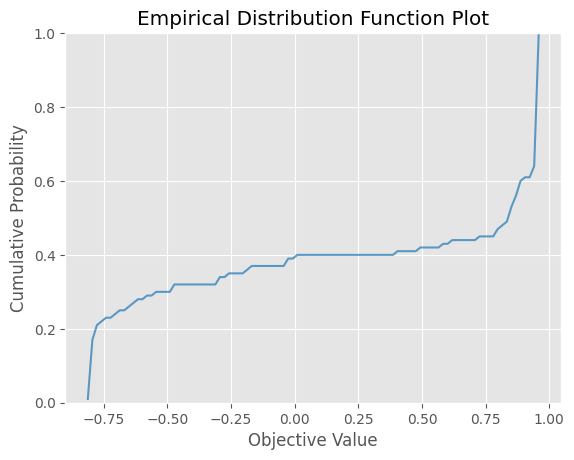

In [189]:
optuna.visualization.matplotlib.plot_edf(study)